### Подключене к Neo4j с помощью Python

### Цель работы


Получение практических навыков подключения к базе данных Neo4j с
помощью Python.

### Индивидуальное задание

**Ювелирная мастерская**

Вы работаете в ювелирной мастерской. Ваша мастерская осуществляет
изготовление ювелирных изделий для частных лиц на заказ. Вы работаете с
определенными материалами (платина, золото, серебро, различные
драгоценные камни и т.д.). При обращении к Вам потенциального клиента Вы
определяетесь с тем, какое именно изделие ему необходимо. Все
изготавливаемые Вами изделия принадлежат к некоторому типу (серьги,
кольца, броши, браслеты), бывают выполнены из определенного материала,
имеют некоторый вес и цену (включающую стоимость материалов и работы).
Ювелирное изделие может состоять из нескольких материалов. Кроме того,
постоянным клиентам мастерская предоставляет скидки.

Подключение к базе данных `Neo4j` с помощью `Python` можно осуществить, используя библиотеку `neo4j`. Для начала необходимо установить библиотеку `neo4j`. Это делается с помощью `pip` команды:

```
pip install neo4j
```

В отдельном файле `.env` описываются параметры подключения. После установки библиотеки можно подключиться к базе данных и выполнить запросы. 

Для начала нужно импортировать необходимые библиотеки и загрузить
файл с параметрами подключения. Затем необходимо написать функцию для
удаления всех данных из БД и для заполнения БД записями.

In [131]:
import os
from dotenv import load_dotenv
from neo4j import GraphDatabase
import pandas as pd

load_dotenv()

NEO4J_URI = os.getenv("NEO4J_URI")
NEO4J_USERNAME = os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")
NEO4J_DBNAME = os.getenv("NEO4J_DBNAME")

def clear_db(session):
    session.run("match (n) detach delete n")

def create_db_by_query(session):
    # Создание клиентов
    session.run("""
    CREATE
    (:Client {id:1, name: 'Никита', surname:'Макаров', birthDate: date('2004-07-02'), discount:0.5}),
    (:Client {id:2, name: 'Умар', surname:'Мазориев', birthDate: date('2004-09-27'), discount:0.1}),
    (:Client {id:3, name: 'Дмитрий', surname:'Митрофанов', birthDate: date('2004-10-15'), discount:0.3}),
    (:Client {id:4, name: 'Шерзод', surname:'Махкамов', birthDate: date('2003-12-20'), discount:0.0}),
    (:Client {id:5, name: 'Влад', surname:'Лайхтман', birthDate: date('2004-11-11'), discount:0.4}),
    (:Client {id:6, name: 'Вова', surname:'Адидас', birthDate: date('2004-01-01'), discount:0.0}),
    (:Client {id:7, name: 'Матвей', surname:'Лежев', birthDate: date('2004-10-01'), discount:0.9});
    """)

    # Создание изделий
    session.run("""
    CREATE
    (:Product {id:1, name: 'Кольцо'}),
    (:Product {id:2, name: 'Серьги'}),
    (:Product {id:3, name: 'Браслет'}),
    (:Product {id:4, name: 'Цепочка'}),
    (:Product {id:5, name: 'Брошь'}),
    (:Product {id:6, name: 'Запонки'});
    """)

    # Создание материалов
    session.run("""
    CREATE
    (:Material {id:1, name:'Золото', pricePerGram:4000}),
    (:Material {id:2, name:'Серебро', pricePerGram:500}),
    (:Material {id:3, name:'Платина', pricePerGram:7000}),
    (:Material {id:4, name:'Бриллиант', pricePerGram:15000}),
    (:Material {id:5, name:'Рубин', pricePerGram:8000}),
    (:Material {id:6, name:'Сапфир', pricePerGram:7000});
    """)

    # Добавление заказов
    session.run("""
    MATCH (c:Client {id:1}), (p:Product {id:1}), (m1:Material {id:1}), (m2:Material {id:4})
    CREATE (c)-[:PLACED]->(o:Order {id:1, date: date('2024-06-03'), price:20000}),
           (o)-[:HAS_PRODUCT {quantity:1}]->(p),
           (o)-[:MADE_OF {weight:10}]->(m1),
           (o)-[:MADE_OF {weight:2}]->(m2);
    """)

    session.run("""
    MATCH (c:Client {id:2}), (p:Product {id:2}), (m:Material {id:2})
    CREATE (c)-[:PLACED]->(o:Order {id:2, date: date('2024-06-10'), price:15000}),
           (o)-[:HAS_PRODUCT {quantity:1}]->(p),
           (o)-[:MADE_OF {weight:8}]->(m);
    """)

    session.run("""
    MATCH (c:Client {id:3}), (p:Product {id:3}), (m:Material {id:3})
    CREATE (c)-[:PLACED]->(o:Order {id:3, date: date('2024-06-12'), price:35000}),
           (o)-[:HAS_PRODUCT {quantity:1}]->(p),
           (o)-[:MADE_OF {weight:15}]->(m);
    """)

    session.run("""
    MATCH (c:Client {id:4}), (p:Product {id:4}), (m:Material {id:1})
    CREATE (c)-[:PLACED]->(o:Order {id:4, date: date('2024-06-15'), price:18000}),
           (o)-[:HAS_PRODUCT {quantity:1}]->(p),
           (o)-[:MADE_OF {weight:12}]->(m);
    """)

    session.run("""
    MATCH (c:Client {id:5}), (p:Product {id:5}), (m:Material {id:5})
    CREATE (c)-[:PLACED]->(o:Order {id:5, date: date('2024-06-20'), price:40000}),
           (o)-[:HAS_PRODUCT {quantity:1}]->(p),
           (o)-[:MADE_OF {weight:5}]->(m);
    """)

    session.run("""
    MATCH (c:Client {id:6}), (p:Product {id:6}), (m:Material {id:6})
    CREATE (c)-[:PLACED]->(o:Order {id:6, date: date('2024-06-25'), price:30000}),
           (o)-[:HAS_PRODUCT {quantity:1}]->(p),
           (o)-[:MADE_OF {weight:7}]->(m);
    """)

    session.run("""
    MATCH (c:Client {id:7}), (p:Product {id:2}), (m:Material {id:2})
    CREATE (c)-[:PLACED]->(o:Order {id:7, date: date('2024-06-28'), price:22000}),
           (o)-[:HAS_PRODUCT {quantity:2}]->(p),
           (o)-[:MADE_OF {weight:8}]->(m);
    """)

    session.run("""
    MATCH (c:Client {id:1}), (p:Product {id:3}), (m:Material {id:3})
    CREATE (c)-[:PLACED]->(o:Order {id:8, date: date('2024-07-01'), price:31000}),
           (o)-[:HAS_PRODUCT {quantity:1}]->(p),
           (o)-[:MADE_OF {weight:15}]->(m);
    """)



def show_clients(session):
    query = "match (c:Client) return c.id, c.name, c.surname, c.birthDate, c.discount"
    clients = pd.DataFrame(session.run(query))
    clients.columns = ["ID", "Имя", "Фамилия", "День_рождения", "Скидка"]
    clients.set_index('ID', inplace=True)
    print("\nКлиенты:\n") 
    display(clients)   

def show_products(session):
    query = "match (p:Product) return p.id, p.name"
    products = pd.DataFrame(session.run(query))
    products.columns = ["ID", "Название"]
    products.set_index('ID', inplace=True)
    print("\nИзделия:\n") 
    display(products)

def show_materials(session):
    query = "match (m:Material) return m.id, m.name, m.pricePerGram"
    materials = pd.DataFrame(session.run(query))
    materials.columns = ["ID", "Название", "Цена_за_грамм"]
    materials.set_index('ID', inplace=True)
    print("\nМатериалы:\n") 
    display(materials)

def show_orders(session):
    query = '''
    match 
        (c:Client)-[P:PLACED]->(o:Order),
        (o)-[HP:HAS_PRODUCT]->(p:Product),
        (o)-[MO:MADE_OF]->(m:Material)
    return 
        o.id as ID,
        (c.name+' '+c.surname) as Клиент, 
        o.date as Дата_заказа, 
        p.name as Изделие, 
        m.name as Материал,
        o.price as Цена
    order by Дата_заказа desc
    '''
    orders = pd.DataFrame(session.run(query))
    orders.columns = ['ID', 'Клиент', 'Дата_заказа', 'Изделие', 'Материал', 'Цена']
    orders.set_index('ID', inplace=True)
    print("\nЗаказы:\n")  
    display(orders)

def create_client(session, name, surname, birthDate, discount, id=None):
    if id is None:
        last_id = session.run(
        "match (c:Client) return coalesce(max(c.id), 0) as last_id"
        ).single()["last_id"]
        id = last_id + 1
        
    session.run(
        """
        create (:Client {
            id: $id,
            name: $name,
            surname: $surname,
            birthDate: date($birthDate),
            discount: $discount
        })
        """,
        id=id,
        name=name,
        surname=surname,
        birthDate=birthDate,
        discount=discount,
    )

def create_product(session, name, id=None):    
    if id is None:
        last_id = session.run(
        "match (p:Product) return coalesce(max(p.id), 0) as last_id"
        ).single()["last_id"]
        id = last_id + 1
        
    session.run(
        """
        create (:Product {
            id: $id,
            name: $name
        })
        """,
        id=id,
        name=name,
    )

def create_material(session, name, pricePerGram, id=None):
    if id is None:
        last_id = session.run(
        "match (m:Material) return coalesce(max(m.id), 0) as last_id"
        ).single()["last_id"]
        id = last_id + 1
        
    session.run(
        """
        create (:Material {
            id: $id,
            name: $name,
            pricePerGram: $pricePerGram
        })
        """,
        id=id,
        name=name,
        pricePerGram=pricePerGram,
    )

def create_order(session, client_id, product_id, material_id, weight, date, price, quantity=1, order_id=None):
    if order_id is None:
        last_id = session.run(
            "match (o:Order) return coalesce(max(o.id), 0) AS last_id"
        ).single()["last_id"]
        order_id = last_id + 1

    session.run(
        """
        match (c:Client {id: $client_id}), (p:Product {id: $product_id}), (m:Material {id: $material_id})
        merge (o:Order {id: $order_id})
        on create set o.date = date($date), o.price = $price
        merge (c)-[:PLACED]->(o)
        merge (o)-[:HAS_PRODUCT {quantity: $quantity}]->(p)
        merge (o)-[:MADE_OF {weight: $weight}]->(m)
        """,
        client_id=client_id,
        product_id=product_id,
        material_id=material_id,
        order_id=order_id,
        date=date,
        price=price,
        quantity=quantity,
        weight=weight,
    )
    print(f"Заказ {order_id} для клиента с ID = {client_id} на товар с ID = {product_id} из материала с ID = {material_id} успешно создан!")


try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            clear_db(session)
            create_db_by_query(session)
            
            
            create_client(session, 'Мария', 'Белова', '1988-10-30', 0.4)
            create_product(session, 'Амулет')
            create_material(session, 'Медь', 100)
            create_order(session, 4, 6, 2, 100, '2025-02-14', 30000)
            
            show_clients(session)
            show_products(session)
            show_materials(session)
            show_orders(session)
            
except Exception as e:
    print(f"Ошибка: {e}")

Заказ 9 для клиента с ID = 4 на товар с ID = 6 из материала с ID = 2 успешно создан!

Клиенты:



,Имя,Фамилия,День_рождения,Скидка
ID,,,,
1,Никита,Макаров,2004-07-02,0.5
2,Умар,Мазориев,2004-09-27,0.1
3,Дмитрий,Митрофанов,2004-10-15,0.3
4,Шерзод,Махкамов,2003-12-20,0.0
5,Влад,Лайхтман,2004-11-11,0.4
6,Вова,Адидас,2004-01-01,0.0
7,Матвей,Лежев,2004-10-01,0.9
8,Мария,Белова,1988-10-30,0.4



Изделия:



,Название
ID,
1,Кольцо
2,Серьги
3,Браслет
4,Цепочка
5,Брошь
6,Запонки
7,Амулет



Материалы:



,Название,Цена_за_грамм
ID,,
1,Золото,4000
2,Серебро,500
3,Платина,7000
4,Бриллиант,15000
5,Рубин,8000
6,Сапфир,7000
7,Медь,100



Заказы:



,Клиент,Дата_заказа,Изделие,Материал,Цена
ID,,,,,
9,Шерзод Махкамов,2025-02-14,Запонки,Серебро,30000
8,Никита Макаров,2024-07-01,Браслет,Платина,31000
7,Матвей Лежев,2024-06-28,Серьги,Серебро,22000
6,Вова Адидас,2024-06-25,Запонки,Сапфир,30000
5,Влад Лайхтман,2024-06-20,Брошь,Рубин,40000
4,Шерзод Махкамов,2024-06-15,Цепочка,Золото,18000
3,Дмитрий Митрофанов,2024-06-12,Браслет,Платина,35000
2,Умар Мазориев,2024-06-10,Серьги,Серебро,15000
1,Никита Макаров,2024-06-03,Кольцо,Золото,20000


Далее выполняются запросы к БД разного уровня сложности

Запрос 1 - Вывести все заказы Никиты Макарова

In [133]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            
            query = '''
            match 
                (c:Client {name:'Никита', surname:'Макаров'})-[P:PLACED]->(o:Order)
            return 
                o.id as ID,
                (c.name+' '+c.surname) as Клиент, 
                o.date as Дата_заказа, 
                o.price as Цена
            '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['ID', 'Клиент', 'Дата_заказа', 'Цена']
            orders.set_index('ID', inplace=True)
            display(orders)
            
except Exception as e:
    print(f"Ошибка: {e}")

,Клиент,Дата_заказа,Цена
ID,,,
1,Никита Макаров,2024-06-03,20000
8,Никита Макаров,2024-07-01,31000


Запрос 2 - Вывести всех клиентов и их заказы

In [134]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            
            show_orders(session)
            
except Exception as e:
    print(f"Ошибка: {e}")



Заказы:



,Клиент,Дата_заказа,Изделие,Материал,Цена
ID,,,,,
9,Шерзод Махкамов,2025-02-14,Запонки,Серебро,30000
8,Никита Макаров,2024-07-01,Браслет,Платина,31000
7,Матвей Лежев,2024-06-28,Серьги,Серебро,22000
6,Вова Адидас,2024-06-25,Запонки,Сапфир,30000
5,Влад Лайхтман,2024-06-20,Брошь,Рубин,40000
4,Шерзод Махкамов,2024-06-15,Цепочка,Золото,18000
3,Дмитрий Митрофанов,2024-06-12,Браслет,Платина,35000
2,Умар Мазориев,2024-06-10,Серьги,Серебро,15000
1,Никита Макаров,2024-06-03,Кольцо,Золото,20000


С помощью библиотеки seaborn визуализируем продажи с течением времени

In [144]:
import seaborn as sns
import matplotlib as plt

try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:   
            query = '''
            match 
                (c:Client)-[P:PLACED]->(o:Order),
                (o)-[HP:HAS_PRODUCT]->(p:Product),
                (o)-[MO:MADE_OF]->(m:Material)
            return 
                o.id as ID,
                (c.name+' '+c.surname) as Клиент, 
                o.date as Дата_заказа, 
                p.name as Изделие, 
                m.name as Материал,
                o.price as Цена
            order by Дата_заказа desc
            '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['ID', 'Клиент', 'Дата_заказа', 'Изделие', 'Материал', 'Цена']
            orders.set_index('ID', inplace=True)
except Exception as e:
    print(f"Ошибка: {e}")

orders.head()

,Клиент,Дата_заказа,Изделие,Материал,Цена
ID,,,,,
9,Шерзод Махкамов,2025-02-14,Запонки,Серебро,30000
8,Никита Макаров,2024-07-01,Браслет,Платина,31000
7,Матвей Лежев,2024-06-28,Серьги,Серебро,22000
6,Вова Адидас,2024-06-25,Запонки,Сапфир,30000
5,Влад Лайхтман,2024-06-20,Брошь,Рубин,40000


Изменение типов данных и визуализация динамики продаж с течением времени

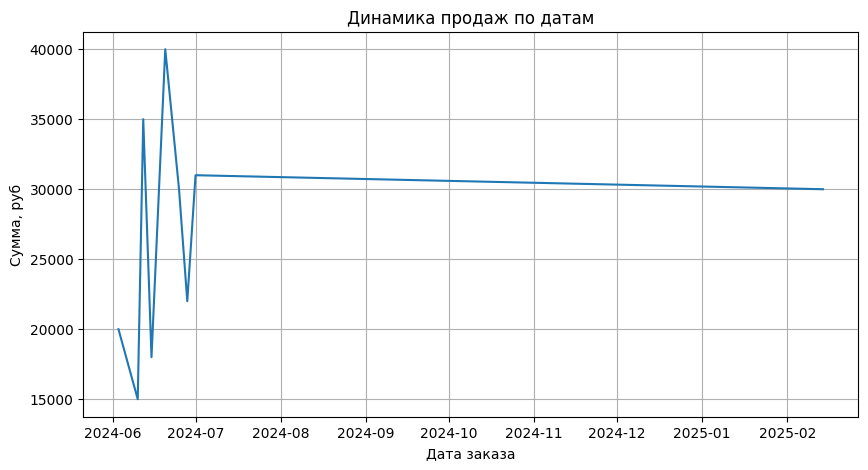

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

orders["Дата_заказа"] = orders["Дата_заказа"].astype(str)
orders["Дата_заказа"] = pd.to_datetime(orders["Дата_заказа"])

plt.figure(figsize=(10, 5))
sns.lineplot(data=orders, x="Дата_заказа", y="Цена")
plt.xlabel("Дата заказа")
plt.ylabel("Сумма, руб")
plt.title("Динамика продаж по датам")
plt.grid(True)
plt.show()

Динамика продаж сильно скачет, из-за маленького количества данных. Но по визуализации видно, что в среднем динамика положительная

Запрос 3 - Вывести все заказы, изделия и материалы 

In [161]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            query = '''
                match 
                    (o:Order)-[HP:HAS_PRODUCT]->(p:Product),
                    (o)-[MO:MADE_OF]->(m:Material)
                return 
                    o.id as ID,
                    o.date as Дата_заказа, 
                    p.name as Изделие, 
                    m.name as Материал,
                    o.price as Цена
                order by Дата_заказа desc
                '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['ID', 'Дата_заказа', 'Изделие', 'Материал', 'Цена']
            orders.set_index('ID', inplace=True)
            display(orders)
except Exception as e:
    print(f"Ошибка: {e}")

,Дата_заказа,Изделие,Материал,Цена
ID,,,,
9,2025-02-14,Запонки,Серебро,30000
8,2024-07-01,Браслет,Платина,31000
7,2024-06-28,Серьги,Серебро,22000
6,2024-06-25,Запонки,Сапфир,30000
5,2024-06-20,Брошь,Рубин,40000
4,2024-06-15,Цепочка,Золото,18000
3,2024-06-12,Браслет,Платина,35000
2,2024-06-10,Серьги,Серебро,15000
1,2024-06-03,Кольцо,Золото,20000


Запрос 4 – Вывести сумму всех заказов, сделанных в первую половину июня 

In [168]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            query = '''
                match 
                    (c:Client)-[p:PLACED]->(o:Order)
                where o.date >= date('2024-06-01')
                    and o.date <= date('2024-06-15')
                with sum(o.price) as total_sum
                return total_sum
                '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['total_sum']
            display(orders)
except Exception as e:
    print(f"Ошибка: {e}")

,total_sum
0,88000


Запрос 5 – Вывести изделия и кол-во их приобретений в порядке убывания количества 

In [172]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            query = '''
            match (o:Order)-[hp: HAS_PRODUCT]->(p:Product)
            with p, count(hp) as Количество_покупок
            order by Количество_покупок desc
            return p.name as Изделие, Количество_покупок
            '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['Изделие', 'Количество покупок']
            display(orders)
except Exception as e:
    print(f"Ошибка: {e}")

,Изделие,Количество покупок
0,Серьги,2
1,Браслет,2
2,Запонки,2
3,Кольцо,1
4,Цепочка,1
5,Брошь,1


Запрос 6 – Вывести имена и фамилии клиентов, которые совершили ровно 2 заказа

In [173]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            query = '''
            match (c:Client)-[p:PLACED]->(o:Order)
            with c, count(p) as cnt
            where cnt = 2
            return c.name, c.surname, cnt
            '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['Имя', 'Фамилия', 'Кол-во']
            display(orders)
except Exception as e:
    print(f"Ошибка: {e}")

,Имя,Фамилия,Кол-во
0,Никита,Макаров,2
1,Шерзод,Махкамов,2


Запрос 7 – Вывести среднюю цену всех материалов.

In [183]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            query = '''
            match (m:Material)
            with round(avg(m.pricePerGram) ,2) as avg
            return avg
            '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['Средняя цена материалов']
            display(orders)
except Exception as e:
    print(f"Ошибка: {e}")

,Средняя цена материалов
0,5942.86


Запрос 8 – Вывести кол-во заказов, сделанных каждым пользователем 

In [185]:
try:
    with GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USERNAME, NEO4J_PASSWORD)) as driver:
        with driver.session(database=NEO4J_DBNAME) as session:
            query = '''
            match(c: Client)-[p:PLACED]->(o:Order)
            with c, count(p) as Количество_заказов
            return
                c.id as ID,
                c.name as Имя,
                c.surname as Фамилия, 
                Количество_заказов
            '''
            orders = pd.DataFrame(session.run(query))
            orders.columns = ['ID', 'Имя', 'Фамилия' , 'Кол-во заказов']
            orders.set_index('ID', inplace=True)
            display(orders)
except Exception as e:
    print(f"Ошибка: {e}")

,Имя,Фамилия,Кол-во заказов
ID,,,
1,Никита,Макаров,2
2,Умар,Мазориев,1
3,Дмитрий,Митрофанов,1
4,Шерзод,Махкамов,2
5,Влад,Лайхтман,1
6,Вова,Адидас,1
7,Матвей,Лежев,1


Далее строится столбчатая диаграмма для сравнения кол-ва совершенных заказов пользователей

<Axes: xlabel='Кол-во заказов', ylabel='Имя'>

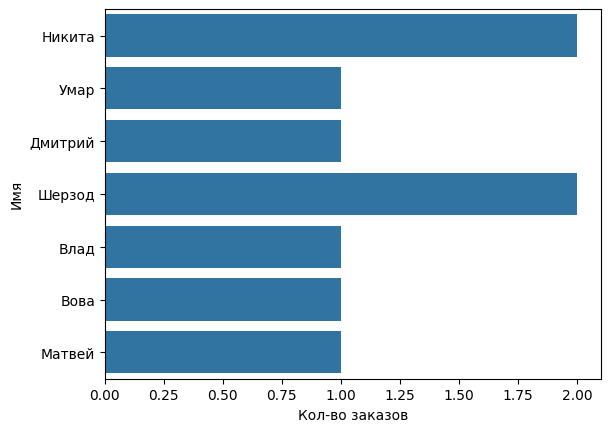

In [190]:
sns.barplot(orders, x='Кол-во заказов', y='Имя')

### Выводы по работе

В ходе выполнения работы были получены навыки работы с графовой базой данных `Neo4j` и языком запросов `Cypher`. Были  изучены процессы развертывания `Neo4j` в среде `Docker`, что позволило быстро запустить базу данных без сложной настройки.

В рамках индивидуального задания была разработана структура данных для ювелирной мастерской, определены основные сущности и связи между ними.

После заполнения базы данных были реализованы несколько запросов к БД различной сложности, например, выборка всех клиентов, заказов, изделий или агрегированные запросы с подсчетом среднего и количества.

Таким образом, работа позволила получить практические навыки работы и проектирования графовой БД `Neo4j`, а также умение работать с языком `Cypher`.